### This notebook contains pieces of code designed to remind Pythons statistical methods
<hr>

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
from scipy.stats import binom, mannwhitneyu

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Probability density distribution normality test

There are some basic methods to test density distribution. The most useful are Shapiro-test, normtest (D'Agostino-test) and QQ-plot. Besides it is necessary to look at the histogram. The example of testing-function I developed ptresented below. 

In [4]:
# function for generating a normal distributed population 

def get_population(mu, sigma, size):
    population = pd.Series(np.random.normal(loc=mu, scale=sigma, size=size))
    
    plt.figure(figsize=(10, 7))
    plt.style.use('ggplot')
    sns.histplot(population, kde=True, bins=50)
    plt.xlabel('value')
    plt.ylabel('frequency')
    plt.vlines(x=population.mean(), ymin=0, ymax=16000, linestyles='--')
    plt.title('Population probability density destribution')
    
    return population

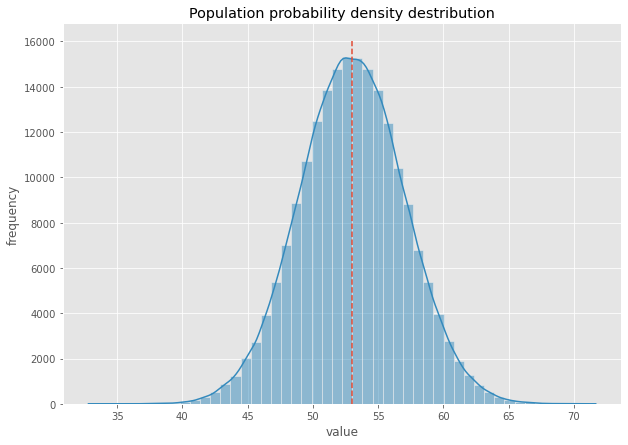

In [5]:
# generating the population
mu = 53       # the population mean
sigma = 4.0   # the population standard diviation
size=200000   # size of the popupation

density_test_population = get_population(mu, sigma, size)

In [6]:
# probability density distribution exploration
def density_distribution(data_column, conf_level:float, plot_title:str, show_info=True):
#   quantiles
    left_quant = (1 - conf_level)/2
    right_quant = 1 - (1 - conf_level)/2
    quants = data_column.quantile([left_quant, right_quant])

#   visualization
    if show_info is True:    
        plt.figure(figsize=(12, 5))
        fig_1 = plt.subplot(1, 2, 1)
        _, _, bars = plt.hist(data_column, bins = 30)
        for bar in bars:
            if bar.get_x() <= quants.iloc[0] or bar.get_x() >= quants.iloc[1]:
                bar.set_facecolor('red')
            else: 
                bar.set_facecolor('grey')
                bar.set_edgecolor('black')

        plt.style.use('seaborn-whitegrid')
        plt.vlines(quants,ymin=0,ymax=15,linestyle='--')
        plt.xlabel(None)
        plt.ylabel(None)
        plt.title(f'{plot_title}\n')
        fig_2 = plt.subplot(1, 2, 2)
        ss.probplot(data_column, plot=plt)
        plt.title(f'{plot_title} QQ-plot\n')
        plt.xlabel(None)
        plt.ylabel(None)
        plt.show()
    
#   Shapiro and D'Agostino normtest
    shapiro_result = ss.shapiro(data_column)
    dagostino_result = ss.normaltest(data_column)
    if ((shapiro_result[1] >= 0.05) & (dagostino_result[1] >= 0.05)):
        if show_info is True:
            print(f'{plot_title} has normal probability density distribution\n Shapiro test p-val {shapiro_result[1]}\n Dagostino p-val {dagostino_result[1]}' )
        return True
    else:
        if show_info is True:
            print(f'{plot_title} has not normal probability density distribution\n Shapiro test p-val {shapiro_result[1]}\n Dagostino p-val {dagostino_result[1]}')
        return False

In [7]:
# getting a sample
testing_sample_n = density_test_population.sample(60)

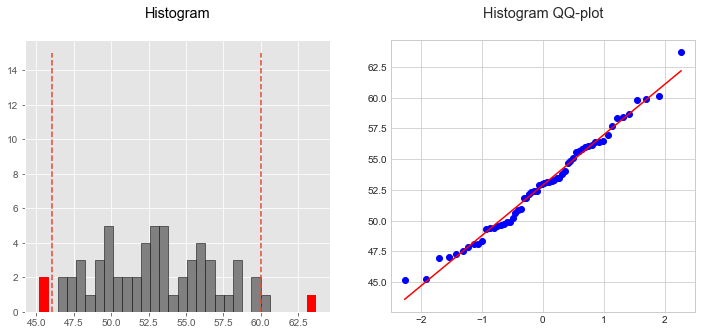

Histogram has normal probability density distribution
 Shapiro test p-val 0.6846891045570374
 Dagostino p-val 0.667088345658235


True

In [8]:
density_distribution(data_column=testing_sample_n, conf_level=0.95, plot_title='Histogram')

## Correlation

In [9]:
def numeric_corr_test(df, dep_var:str, indep_vars=None):
    if (indep_vars is None) & (type(dep_var) == str):
        indep_vars = list(filter(lambda column: column != dep_var, regimes._get_numeric_data().columns.to_list()))
    elif (indep_vars is None) & (type(dep_var) != str):
        indep_vars = list(filter(lambda column: column != dep_var.name, regimes._get_numeric_data().columns.to_list()))
    elif (type(indep_vars) != list) & (type(indep_vars) != str):
        indep_vars = indep_vars.columns.to_list()
    elif type(indep_vars) == str:
        indep_vars = list(indep_vars)
    if type(dep_var) == str:
        dep_var = df[dep_var]
    corr_df = pd.DataFrame(index=indep_vars, columns=[['spearman_corr', 'spearman_sign', 'pearson_corr', 'pearson_sign', 'linear_corr', 'linear_sign']])
    for var in indep_vars:
        corr_df.loc[var, 'spearman_corr'] = round(ss.spearmanr(dep_var, df[var])[0], 2)
        corr_df.loc[var, 'spearman_sign'] = np.where(ss.spearmanr(dep_var, df[var])[1] < 0.05, 'significant', 'not significant')
        corr_df.loc[var, 'pearson_corr'] = round(ss.pearsonr(dep_var, df[var])[0], 2)
        corr_df.loc[var, 'pearson_sign'] = np.where(ss.pearsonr(dep_var, df[var])[1] < 0.05, 'significant', 'not significant')
        corr_df.loc[var, 'linear_corr'] = round(ss.linregress(dep_var, df[var])[2], 2)
        corr_df.loc[var, 'linear_sign'] = np.where(ss.linregress(dep_var, df[var])[3] < 0.05, 'significant', 'not significant')
    styled_corr_df = corr_df.style.applymap(lambda x: "background-color: pink" if x=='not significant' 
                                            else "background-color: white").format_index(lambda x: x[0], axis=1)
    return styled_corr_df
    


def linear_visualization(df, dep_var:str, indep_vars=None):
    if (indep_vars is None) & (type(dep_var) == str):
        indep_vars = list(filter(lambda column: column != dep_var, regimes._get_numeric_data().columns.to_list()))
    elif (indep_vars is None) & (type(dep_var) != str):
        indep_vars = list(filter(lambda column: column != dep_var.name, regimes._get_numeric_data().columns.to_list()))
    elif (type(indep_vars) != list) & (type(indep_vars) != str):
        indep_vars = indep_vars.columns.to_list()
    elif type(indep_vars) == str:
        indep_vars = list(indep_vars)
    if type(dep_var) == str:
        dep_var = df[dep_var]
    
    plt.figure(figsize=(15, 1.5*len(indep_vars)))
    for i, indep_var in enumerate(indep_vars):
        i += 1
        ax = plt.subplot(ceil(len(indep_vars)/3) , 3, i)
        sns.regplot(data=df, x=indep_var, y=dep_var)
        plt.xlabel(None)
        plt.ylabel(None)
        plt.grid(False)
        ax.set(yticklabels=[], xticklabels=[])
        plt.title('\n' + indep_var.capitalize().replace('_', ' '))

    plt.show()
    
    
def hist_plots(df, data_columns=None, data_included=0.95, scale_plots=1.7):
    if (data_columns is None):
        data_columns = df.columns.to_list()
    elif (type(data_columns) != list) & (type(data_columns) != str):
        data_columns = data_columns.columns.to_list()
    elif type(data_columns) == str:
        data_columns = [data_columns]
        
    plt.figure(figsize=(15, scale_plots*len(data_columns)))    
    for i, col in enumerate(data_columns):
        i += 1
        data_column = df[col]
        ax = plt.subplot(ceil(len(data_columns)/3) , 3, i)
        plot_title = '\n' + col.capitalize().replace('_', ' ')
    #   quantiles
        left_quant = (1 - data_included)/2
        right_quant = 1 - (1 - data_included)/2
        quants = data_column.quantile([left_quant, right_quant])

    #   visualization   
        _, _, bars = plt.hist(data_column, bins = 30)
        for bar in bars:
            if bar.get_x() <= quants.iloc[0] or bar.get_x() >= quants.iloc[1]:
                bar.set_facecolor('red')
            else: 
                bar.set_facecolor('grey')
                bar.set_edgecolor('black')

        plt.style.use('seaborn-whitegrid')
        plt.vlines(quants,ymin=0,ymax=15,linestyle='--')
        plt.xlabel(None)
        plt.ylabel(None)
        ax.set(yticklabels=[])
        plt.title(plot_title)

    plt.show()

## Categorical data 

In [10]:
# visualization of the categorycal data    
def bar_plots(df, data_columns=None, scale_plots=1.7):
    if (data_columns is None):
        data_columns = df.columns.to_list()
    elif (type(data_columns) != list) & (type(data_columns) != str):
        data_columns = data_columns.columns.to_list()
    elif type(data_columns) == str:
        data_columns = [data_columns]
        
    plt.figure(figsize=(15, scale_plots*len(data_columns)))    
    for i, col in enumerate(data_columns):
        i += 1
        data_column = df[col]
        ax = plt.subplot(ceil(len(data_columns)/3) , 3, i)
        plot_title = '\n' + col.capitalize().replace('_', ' ')

    #   visualization   
        sns.countplot(y=df[col], color='navy', order=df[col].value_counts().index)

        plt.style.use('seaborn-whitegrid')
        ax.set(xlabel=None, ylabel=None)
        ax.set(xticklabels=[])
        plt.title(plot_title)

    plt.show()

<hr>

## A/B

In [11]:
# function to conduct A/B-test using different methods
def ab_test(a_data,  # the feature of A group
            b_data,  # the feature of B group
            boot_it=1000, # number of bootstrap subsamples
            statistic = np.mean, # the bootstrap statistic we interested in 
            conf_level = 0.95, # the confidence level
            method = ['ttest', 'mannwhitneyu', 'bootstrap']
           ):
    
    
    plots = [a_data, b_data]
#   BOOTSTRAP
    if 'bootstrap' in method:
        boot_data = []
        for i in tqdm(range(boot_it)): # extracting subsamples
            samples_1 = a_data.sample(
                len(a_data), 
                replace = True # 
            ).values

            samples_2 = b_data.sample(
                len(b_data), 
                replace = True
            ).values

            boot_data.append(statistic(samples_1)-statistic(samples_2)) # calculate bootstrap statistic difference

        pd_boot_data = pd.Series(boot_data)

        left_quant = (1 - conf_level)/2
        right_quant = 1 - (1 - conf_level) / 2
        quants = pd_boot_data.quantile([left_quant, right_quant])

        p_1 = norm.cdf(
            x = 0, 
            loc = np.mean(boot_data), 
            scale = np.std(boot_data)
        )
        p_2 = norm.cdf(
            x = 0, 
            loc = -np.mean(boot_data), 
            scale = np.std(boot_data)
        )
        p_value = min(p_1, p_2) * 2
        
        pd_boot_data.name = 'Booted data'
        plots.append(pd_boot_data)
    
    # visualization    
    a_data.name = 'group A'
    b_data.name = 'group B'
    plt.figure(figsize=(17, 11))
    
    for i, data in enumerate(plots):
        i += 1
        ax = plt.subplot(3, 3, i)
        plot_title = '\n' + data.name
        quantiles = data.quantile([left_quant, right_quant])  
        
        _, _, bars = plt.hist(data, bins = 50)
        for bar in bars:
            if bar.get_x() <= quantiles.iloc[0] or bar.get_x() >= quantiles.iloc[1]:
                bar.set_facecolor('red')
            else: 
                bar.set_facecolor('grey')
                bar.set_edgecolor('black')

        plt.style.use('seaborn-whitegrid')
        plt.vlines(quantiles,ymin=0,ymax=(len(data)*0.06),colors='red',linestyle='--')
        plt.vlines(data.mean(),ymin=0,ymax=(len(data)*0.06),colors='yellow',linestyle='--')
        plt.xlabel(None)
        plt.ylabel(None)
        plt.grid(False)
        ax.set(yticklabels=[])
        plt.title(plot_title)
    plt.show()
    
    if 'mannwhitneyu' in method:
        mann_whitney = ss.mannwhitneyu(a_data, b_data)
    if 'ttest' in method:
        ttest = ss.ttest_ind(a_data, b_data)
    
    if 'bootstrap' in method: 
        if ((p_value < (1 - conf_level)) & (0.0 >= quants.min()) & (0.0 <= quants.max())):
            print(f'Bottstrap quants {quants.to_list()},\nBootstrap p-val {p_value}\n\n'
                  f'WE HAVE THE REASON TO REJECT THE NULL HYPOTESYS RELYING ON BOOTSTRAP\n\n')
        else:
            print(f'Bottstrap quants {quants.to_list()},\nBootstrap p-val {p_value}\n\n'
                  f'WE HAVE NOT THE REASON TO REJECT THE NULL HYPOTESYS RELYING ON BOOTSTRAP\n\n')
    if 'mannwhitneyu' in method:
        if (mann_whitney[1] < (1 - conf_level)):
            print(f'Mann-Whitney p-val {mann_whitney[1]}\n\nWE HAVE THE REASON TO REJECT THE NULL HYPOTESYS RELYING ON MANN-WHITNEY\n\n')
        else:
            print(f'Mann-Whitney p-val {mann_whitney[1]}\n\nWE HAVE NOT THE REASON TO REJECT THE NULL HYPOTESYS RELYING ON MANN-WHITNEY\n\n')
    if 'ttest' in method:
        if (ttest[1] < (1 - conf_level)):
            print(f't-test p-val {ttest[1]}\n\nWE HAVE THE REASON TO REJECT THE NULL HYPOTESYS RELYING ON T-TEST\n\n')
        else:
            print(f't-test p-val {ttest[1]}\n\nWE HAVE NOT THE REASON TO REJECT THE NULL HYPOTESYS RELYING ON T-TEST\n\n')
        
#     return {
#             'bootstrap_quants': quants,
#             'bootsrap_p_value': p_value,
#             'mann_whitney_p_value': mann_whitney[1],
#             'ttest_p_value': ttest[1]
#             }

## Standard deviation for ratio-metric

In [12]:
from scipy.stats import ttest_ind_from_stats

# num – числитель, den – знаменатель
num_1 = np.array([1,2,3,4,5])
den_1 = np.array([2,3,4,5,6])
num_2 = np.array([1,2,3,8,5])
den_2 = np.array([2,9,4,5,6])

def deltamethod(x, y, independent = False, bc = False):
    n = len(x)
    mux = np.mean(x)
    muy = np.mean(y)
    
    v11 = np.var(y,ddof=1)
    v22 = np.var(x,ddof=1)
    if independent == True:
        v12 = 0
    else: 
        v12 = np.cov(x,y)[0][1]
    
    rto = muy / mux
    est = rto - 1
    if bc == True:
        est = est +muy/mux**3*v22/n - 1/mux**2*v12/n
    sdest = (v11 / mux**2) - (2 * muy / mux**3 * v12) + (muy**2 / mux**4 * v22)
    sdest = np.sqrt(sdest)
    return est, sdest

# Считаем оценку ratio и дисперсий
rto_1, sdest_1 = deltamethod(num_1,den_1,independent=True,bc=True)
rto_2, sdest_2 = deltamethod(num_2,den_2,independent=True,bc=True)

# Для effect_size
lift = 0.1
effect_size = rto_1 * lift / sdest_1

# Дополнительно: демонстрация использования в раcчете t-теста
ttest_ind_from_stats(
    mean1 = rto_1, 
    std1 = sdest_1, 
    nobs1 = 5, 
    mean2 = rto_2, 
    std2 = sdest_2, 
    nobs2 = 5,
    equal_var = False)

Ttest_indResult(statistic=-0.16000188053475753, pvalue=0.877216384822124)

<hr>

## Sample size of non-parametric distribution test

In [15]:
# function to determine a sample size of nonparametric statistical test using the numeric Monte-Carlo method
def nonparam_sample_size(data_column, calculations=1000, alpha=0.05, lifts=np.arange(1, 1.02, 0.01), sizes=np.arange(500, 701, 200)):    

    res_df = pd.DataFrame() # calculation results are here

    for lift, n in tqdm(product(lifts, sizes)): 

        control = data_column.sample(n)

        # applying an effect
        test = control * lift 

        for _ in range(0, calculations):

            # A/B random grouping
            is_control = binom.rvs(1, 0.5, size=n) 

            # count p-value
            _, p = mannwhitneyu(control[is_control == True], test[is_control == False]) 

            # append result to df
            res_df = res_df.append({"lift": f'{int((lift-1.0)*100)}%', 
                                    "sample_size": n, "pvalue": p}, 
                                    ignore_index=True)

    result = res_df.groupby(["lift", "sample_size"]).apply(lambda x: sum(x['pvalue'] < alpha) / calculations)\
                   .to_frame().rename(columns={0: 'FPR/TPR'})
    return result 